# **Estudo de Caso: Machine Learning p/ reconhecimento de máscaras**

por Maria Eduarda de Azevedo

De modo geral, utilizaremos o algoritmo K-Nearest Neighbors (KNN) para o treinamento de um modelo classificador que será capaz de identificar se uma pessoa está ou não usando máscara.

In [1]:
# Importando bibliotecas
import cv2 as cv
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

## Carregando o conjunto de dados -> dataframe
Após importarmos as bibliotecas, iremos carregar os nossos conjuntos de dados.

In [8]:
def carrega_dataframe():
  dados = {
      "ARQUIVO": [],
      "ROTULO": [],
      "ALVO": []
  }

  caminho_com_mascara = "/content/drive/MyDrive/Colab Notebooks/Mask-detect/imagens/com-mascara"
  caminho_sem_mascara = "/content/drive/MyDrive/Colab Notebooks/Mask-detect/imagens/sem-mascara"

  com_mascara = os.listdir(caminho_com_mascara)
  sem_mascara = os.listdir(caminho_sem_mascara)

  for arquivo in com_mascara:
    dados["ARQUIVO"].append(f"{caminho_com_mascara}{os.sep}{arquivo}")
    dados["ROTULO"].append(f"Com mascara")
    dados["ALVO"].append(1)
  
  for arquivo in sem_mascara:
    dados["ARQUIVO"].append(f"{caminho_sem_mascara}{os.sep}{arquivo}")
    dados["ROTULO"].append(f"Sem mascara")
    dados["ALVO"].append(0)

  dataframe = pd.DataFrame(dados)

  return dataframe 

In [9]:
dados = carrega_dataframe()

In [10]:
dados

,ARQUIVO,ROTULO,ALVO
0,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
1,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
2,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
3,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
4,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
...,...,...,...
992,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Sem mascara,0
993,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Sem mascara,0
994,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Sem mascara,0
995,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Sem mascara,0


In [11]:
dados.to_csv("/content/drive/MyDrive/Colab Notebooks/Mask-detect/imagens-df.csv")

## Lendo a dataframe das imagens

In [22]:
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mask-detect/imagens-df.csv")

In [23]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
1,1,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
2,2,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
3,3,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1
4,4,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1


In [24]:
def ler_imagens(dados):
  arquivos = dados["ARQUIVO"]
  imagens = list()

  for arquivo in arquivos:
    img = cv.cvtColor(cv.imread(arquivo), cv.COLOR_BGR2GRAY).flatten()
    imagens.append(img)

  dados["IMAGEM"] = imagens 

In [25]:
ler_imagens(dados)

In [26]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO,IMAGEM
0,0,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1,"[185, 184, 184, 185, 187, 189, 189, 188, 190, ..."
1,1,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1,"[64, 63, 62, 60, 58, 59, 62, 65, 63, 63, 57, 5..."
2,2,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1,"[82, 76, 69, 68, 69, 67, 62, 57, 61, 65, 70, 7..."
3,3,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1,"[38, 36, 34, 35, 36, 36, 33, 30, 28, 31, 35, 3..."
4,4,/content/drive/MyDrive/Colab Notebooks/Mask-de...,Com mascara,1,"[123, 141, 114, 159, 129, 144, 103, 128, 122, ..."


## Separando conjunto de dados: train_test_slipt

In [27]:
X = list(dados["IMAGEM"])
y = list(dados["ALVO"])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=13)

## Análise de Componentes Principais (ACP, ou PCA (eng))

De modo geral, o PCA é um método que tem por finalidade analisar um conjunto de dados e escolher as formas mais representativas para tal. Ou seja, o PCA irá extrair da nossa imagem apenas as características mais notáveis para a classificação.

In [29]:
pca = PCA(n_components=30)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Após extrairmos as características da nossa imagem utilizando o PCA, poderemos partir para o treinamento do KNN. 

Para isso, utilizaremos a implementação do algoritmo de classificação no scikit-learn, dado por **KNeighborsClassifier()**.

## GridSearch (p/ escolha dos hiperparâmetros necessários)

In [34]:
parametros = {
    "n_neighbors": [2, 3, 5, 11, 19, 23, 29],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattam", "cosine", "l1", "l2"]
}

In [35]:
knn = GridSearchCV(KNeighborsClassifier(), parametros)

In [36]:
knn.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattam', 'cosine', 'l1',
                                    'l2'],
                         'n_neighbors': [2, 3, 5, 11, 19, 23, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Com o modelo treinado, poderemos observar algumas métricas de desempenho.

## Testando o modelo

In [37]:
knn.score(X=X_test, y=y_test)

0.8

In [38]:
predicao = knn.predict(X_test)

In [39]:
verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [40]:
verdadeiros_positivos, verdadeiros_negativos

(7, 1)

In [41]:
falsos_positivos, falsos_negativos

(2, 0)

In [ ]:
"""
from google.colab import files
importados = files.upload()
print("Arquivos importados:")
print(*importados, sep="\n")
"""

In [48]:
classificador = cv.CascadeClassifier(f"{cv.haarcascades}/haarcascade_frontalface_alt2.xml")

In [49]:
def processar_imagem(pca, classificador, imagem):
  img = cv.imread(imagem)
  imagem_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  faces = classificador.detectMultiScale(img)
  vetores = list()
  cont = 0
  fig = plt.figure(figsize=(10,10))
  for x,y,w,h in faces:
    face_cortada = imagem_cinza[y:y+h, x:x+w]
    fig.add_subplot(3, 3, cont+1)
    plt.imshow(cv.cvtColor(face_cortada, cv.COLOR_BGR2RGB))
    cont += 1
    face_cortada = cv.resize(face_cortada, (160,160))
    vetor = face_cortada.flatten()
    vetores.append(vetor)
  
  plt.show()
  return vetores

In [50]:
classes = {
    0: "Sem máscara",
    1: "Com máscara"
}

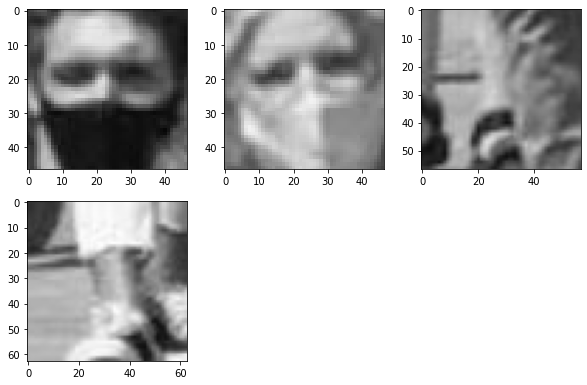

Com máscara - Com máscara - Sem máscara - Com máscara


In [52]:
vetores = processar_imagem(pca, classificador, "pessoas-na-rua-2.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" - ")

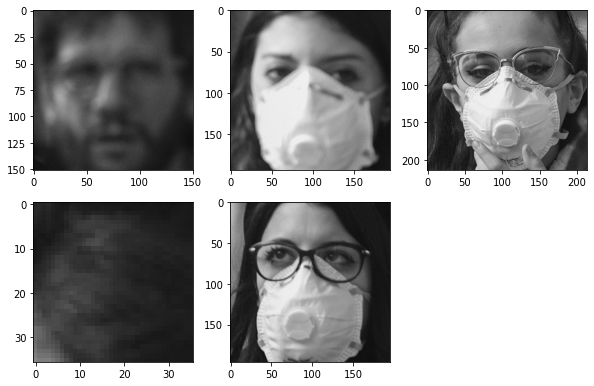

Sem máscara - Com máscara - Com máscara - Sem máscara - Com máscara


In [54]:
vetores = processar_imagem(pca, classificador, "pessoas-na-rua-4.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" - ")